<a href="https://colab.research.google.com/github/morprukop/RetailSalesAnalysis/blob/morgan/mp_proj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/My Drive/Shareddrives/Project_1/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_features = pd.read_csv('/content/drive/Shareddrives/Project_1/store_features.csv')
df_features['Date'] = pd.to_datetime(df_features['Date'])
df_features.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
dtype: object

In [ ]:
df_sales = pd.read_csv('/content/drive/Shareddrives/Project_1/sales.csv')
df_sales['Date'] = pd.to_datetime(df_sales['Date'])
df_sales.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

# Data Cleaning

In [ ]:
df_features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [ ]:
df_sales.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [ ]:
df_features.shape

(8190, 12)

In [ ]:
df_sales.shape

(140679, 5)

Replace our missing/Na/NaNs with 0's for our markdown columns 

Remove incorrect IsHoliday column from both features and sales datasets

Drop the NAs from the features dataset

merge the sales and features datasets together on Store and Date columns

In [ ]:
df_features = df_features.drop(['IsHoliday','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1)
df_sales = df_sales.drop(['IsHoliday'], axis = 1)

df_feat = df_features.dropna()
df_feat.shape

(7605, 6)

In [ ]:
df = pd.merge(df_feat,df_sales, on=['Store','Date'])
df.head(5)

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,Dept,Weekly_Sales
0,1,2010-05-02,42.31,2.572,211.096358,8.106,1,24924.50
1,1,2010-05-02,42.31,2.572,211.096358,8.106,2,50605.27
2,1,2010-05-02,42.31,2.572,211.096358,8.106,3,13740.12
3,1,2010-05-02,42.31,2.572,211.096358,8.106,4,39954.04
4,1,2010-05-02,42.31,2.572,211.096358,8.106,5,32229.38


##Creating a holiday dataframe to help 

In [ ]:
# key range for holiday dictionary
# 0. : memorial day, 1: Halloween, 2: Thanksgiving, 3: Black Friday, 4: Christmas, 5: NYE
#Monday, May 31

holiRange = [{'Holiday':'Memorial Day','Beg. Date':'2010-05-31', 'End Date': '2010-05-31'}
             ,{'Holiday':'Halloween','Beg. Date':'2010-10-17', 'End Date': '2010-10-31'}
             ,{'Holiday':'Thanksgiving','Beg. Date':'2010-11-11', 'End Date': '2010-11-25'}
             ,{'Holiday':'Black Friday','Beg. Date':'2010-11-26', 'End Date': '2010-11-26'}
             ,{'Holiday':'Christmas','Beg. Date':'2010-12-11', 'End Date': '2010-12-25'}
             ,{'Holiday':'New Years Eve','Beg. Date':'2010-12-17', 'End Date': '2010-12-31'}]


df_h = pd.DataFrame.from_records(holiRange)
#giving custom unique keys
df_h = pd.DataFrame.from_records(holiRange, index=['0', '1', '2','3','4','5'])
df_h = pd.DataFrame.from_dict(holiRange, orient='columns')

# Convert a list of dictionaries using json_normalize().
df_h = pd.json_normalize(holiRange)

df_h['Beg. Date'] = pd.to_datetime(df_h['Beg. Date'])
df_h['End Date'] = pd.to_datetime(df_h['End Date'])

In [ ]:
IsHoliday = []
Holiday = []
for daye in df["Date"]:
  givDay = daye.day
  givMonth = daye.month

  for i in range(0,6):
    startDate = df_h.iloc[i]['Beg. Date'].day

    startMonth = df_h.iloc[i]['Beg. Date'].month
    diff = givDay - startDate

    if givMonth == startMonth: 
      if diff <= 14 and diff >= 0:
        Holiday.append(df_h.iloc[i]['Holiday'])
        IsHoliday.append(True)
        break
      elif i == 5:
        Holiday.append('None')
        IsHoliday.append(False)
        break
    elif i == 5: 
      Holiday.append('None')
      IsHoliday.append(False)
      break
    else: 
      continue

In [ ]:
df['Holiday'] = Holiday
df['IsHoliday'] = IsHoliday
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [ ]:
df.head()
df.to_csv("2010Retail.csv")

#Holidays & Weekly Sales analysis


In [ ]:
holiSeries = df['IsHoliday']
unemployementSeries = df['Unemployment']

holiGroup = df.groupby(Holiday).sum()

,Store,Temperature,Fuel_Price,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday,Day,Month,Year
Black Friday,65217,139073.01,8576.822,4.941899e+05,24760.115,129373,6.582100e+07,2938,76388,32318,5905380
Christmas,196091,382395.05,26248.196,1.487297e+06,74537.653,389546,1.888770e+08,8843,153455,106116,17774430
Halloween,130057,343877.28,16742.673,9.872140e+05,49445.188,258193,8.666950e+07,5866,149576,58660,11790660
New Years Eve,65261,106207.76,8980.338,4.946418e+05,24827.347,129715,4.043252e+07,2943,91233,35316,5915430
None,2595072,7282268.13,328216.650,1.964138e+07,990103.566,5175622,1.861960e+09,0,1697346,720254,235517730


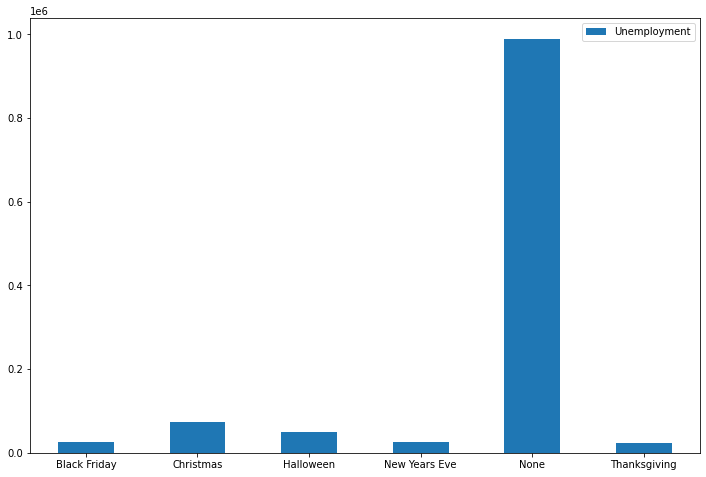

In [ ]:
ax = holiGroup.plot.bar(y='Unemployment', rot=0, figsize = [12,8])

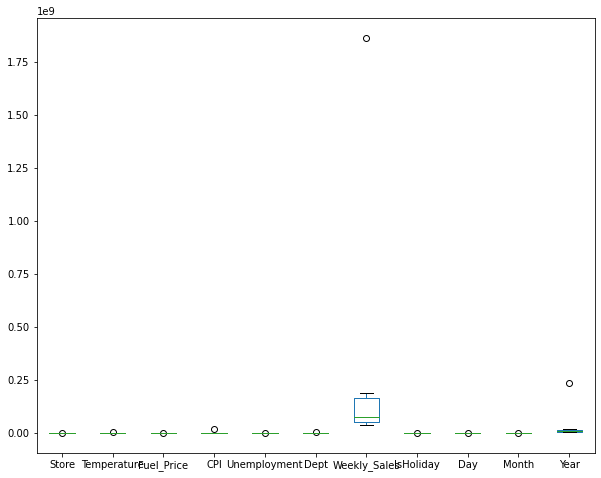

In [ ]:
ax = holiGroup.plot.box(by='Price', figsize=(10, 8))